In [1]:
library(ggplot2)
options(repr.plot.height=8,repr.plot.width=12)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

Con el metodo names renombramos las columnas del dataframe

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb)<-newnames

In [5]:
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [6]:
paste('creo la nueva columna con el calculo, lo redondeo a dos decimales')
airbnb$MetrosCuadrados<-round(airbnb$PiesCuadrados* 0.092903,2)


[1] "creo la nueva columna con el calculo, lo redondeo a dos decimales"

In [7]:
head(airbnb)


,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [8]:
airbnb$CodigoPostal[airbnb$CodigoPostal==""]<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="-"]<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="28"]<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=="28002\n28002"]<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal=="28051\n28051"]<-'28051'
airbnb$CodigoPostal[airbnb$CodigoPostal=="2804"]<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=="2805"]<-'28005'
airbnb$CodigoPostal[airbnb$CodigoPostal=="2815"]<-'28015'
airbnb$CodigoPostal[grepl("^28",airbnb$CodigoPostal)==FALSE]<-NA



Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [9]:
na.omit(unique(airbnb$CodigoPostal))


[1] 28004  28015  28013  28005  28012  28014  28045  28007  28028  28009 
[11] 28001  28006  28010  28002  28034  28050  28008  28011  28049  28038 
[21] 28053  28047  28025  28019  28024  28016  28036  28046  28039  28020 
[31] 28003  28029  28054  28041  28026  28058  28018  28030  28017  28027 
[41] 28043  28033  28055  28021  28032  28037  28022  28042  28094  280013
[51] 28035  28040  28031  28044  28105  28023  28051  28850  28048  28056 
[61] 28060  28052 
attr(,"na.action")
[1] 8
attr(,"class")
[1] omit
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [10]:
dfCodigo<-data.frame(airbnb$CodigoPostal)
tbl_cp<-table(dfCodigo)
sort(tbl_cp, decreasing = TRUE)[1:5]

paste('cuento los que tienen entrada mayor que 0 ya que habia codigos postales con 0')
zero<-sum(as.numeric(tbl_cp)==0)+1
sort(tbl_cp, decreasing = FALSE)[zero:(zero+5)]



dfCodigo
28012 28004 28005 28013 28014 
 2060  1795  1195  1019   630 

[1] "cuento los que tienen entrada mayor que 0 ya que habia codigos postales con 0"

dfCodigo
280013  28048  28052  28056  28058  28060 
     1      1      1      1      1      1 

¿Cuales son los barrios que hay en el código postal 28012?

In [11]:
na.omit(unique(airbnb$Barrio[airbnb$CodigoPostal=='28012']))


[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
attr(,"na.action")
[1] 3
attr(,"class")
[1] omit
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [12]:
numBarrios<-length(na.omit(unique(airbnb$Barrio[airbnb$CodigoPostal=='28012'])))
tbl_barrio<-table(airbnb$Barrio[airbnb$CodigoPostal=='28012'])
sort(tbl_barrio, decreasing = TRUE)[1:numBarrios]
paste(' no es muy fiable la columna ya que muchos barrios tienen el mismo codigo postal')


    Embajadores             Sol          Cortes Palos de Moguer         Palacio 
           1449             301             216              46              27 
        Acacias     Universidad        Arapiles          Atocha        Delicias 
             13               4               1               1               1 
           Goya 
              1 

[1] " no es muy fiable la columna ya que muchos barrios tienen el mismo codigo postal"

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [13]:
tbl_cant<-table(unique(airbnb$Barrio))
paste('en el dataset hay ',sum(tbl_cant),' barrios')
unique(airbnb$Barrio)

[1] "en el dataset hay  125  barrios"

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [14]:
tbl_barrio_mayor<-table(airbnb$Barrio)
sort(tbl_barrio_mayor, decreasing = TRUE)[1:5]


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [15]:
tbl_alquiler<-table(airbnb$TipoAlquiler)
tbl_alquiler_cant<-table(unique(airbnb$TipoAlquiler))
paste('hay ', sum(tbl_alquiler_cant), ' tipos de alquiler')
tbl_alquiler

[1] "hay  3  tipos de alquiler"


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

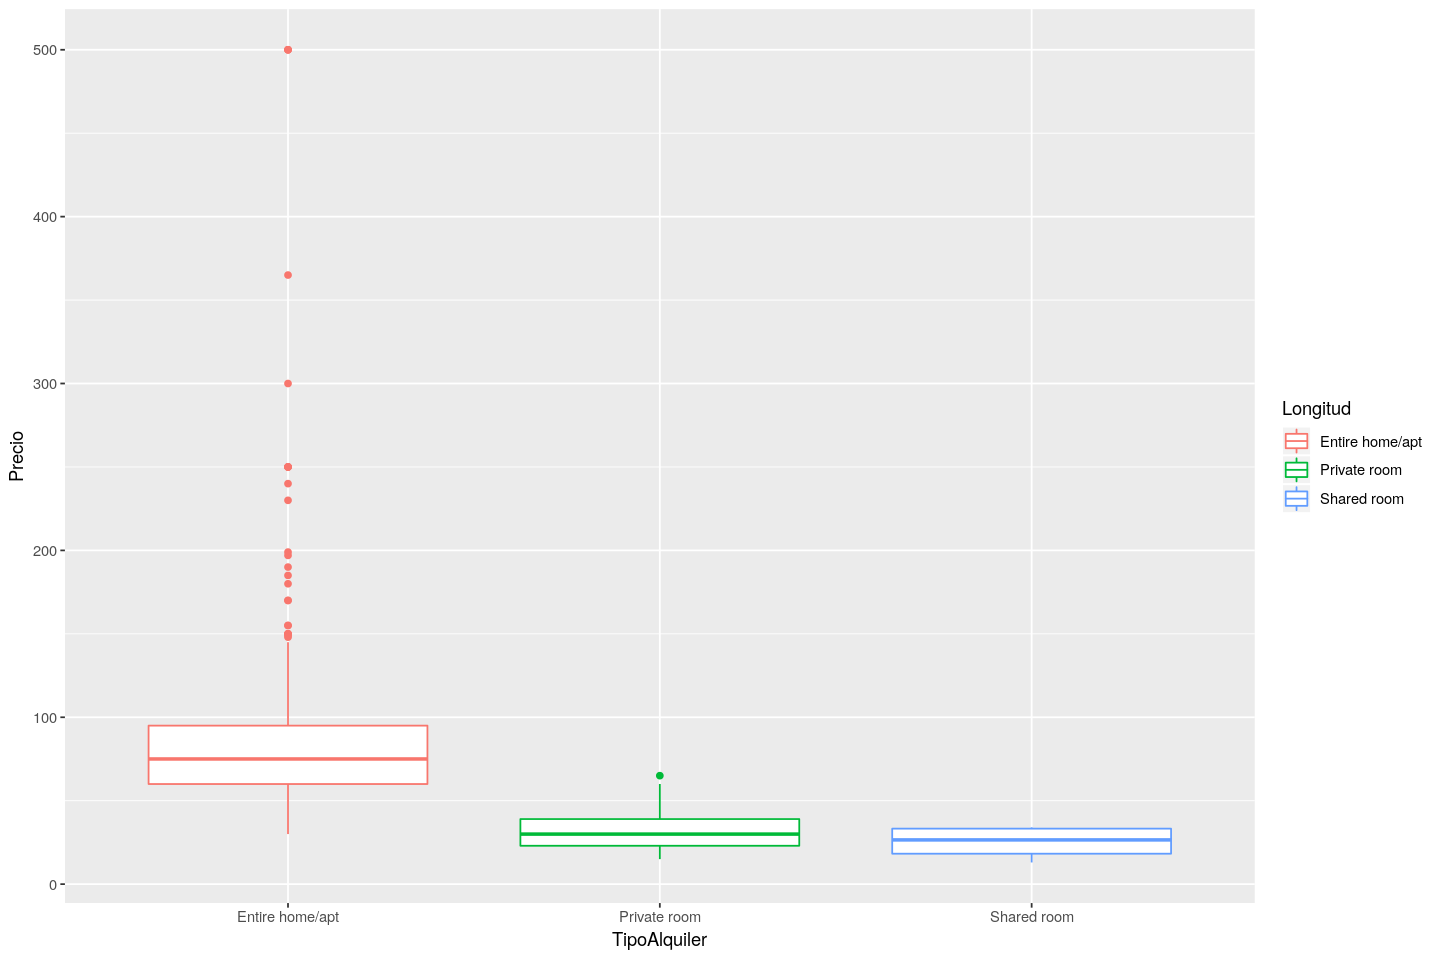

In [17]:
#creo otro dataframe para quitar los NA ya que me daba error si no los quitaba
airbnb_cajas<-data.frame(na.omit(airbnb))

ggplot(data=airbnb_cajas, aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
 scale_color_discrete(name="Longitud")


Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [18]:
media_entire<-mean(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt']))
media_private<-mean(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Private room']))
media_shared<-mean(na.omit(airbnb$Precio[airbnb$TipoAlquiler=='Shared room']))
paste('Precio medio de Entire home /apt: ',round(media_entire,2))
paste ('Precio medio de Privater room: ',round(media_private,2))
paste ('Precio medio de shared room: ',round(media_shared,2))
airbnb_test<-data.frame(airbnb[sample (1:nrow(airbnb),5000),])
entire_home<-airbnb_test$Precio[airbnb_test$TipoAlquiler=='Entire home/apt']
private_room<-airbnb_test$Precio[airbnb_test$TipoAlquiler=='Private room']
shared_room<-airbnb_test$Precio[airbnb_test$TipoAlquiler=='Shared room']
shapiro.test(entire_home)
shapiro.test(private_room)
shapiro.test(shared_room)
paste('vemos con el test de shapiro que no lleva una distribución normal asi que utilizaremos el test Kruskal-Wallis')

[1] "Precio medio de Entire home /apt:  87.3"

[1] "Precio medio de Privater room:  34.26"

[1] "Precio medio de shared room:  29.85"


	Shapiro-Wilk normality test

data:  entire_home
W = 0.66736, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  private_room
W = 0.47588, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  shared_room
W = 0.53645, p-value = 1.995e-13


[1] "vemos con el test de shapiro que no lleva una distribución normal asi que utilizaremos el test Kruskal-Wallis"

In [19]:
kruskal.test( Precio~TipoAlquiler, data=airbnb)
paste('vemos que el p valor es muy bajo y asumimos que no es estadisticamente significativo')


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "vemos que el p valor es muy bajo y asumimos que no es estadisticamente significativo"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [20]:
airbnb_entire<-airbnb[(airbnb$TipoAlquiler)=='Entire home/apt',]
head(airbnb_entire)


,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [21]:
tbl_barrio_apartamentos<-table(airbnb_entire$Barrio)
sort(tbl_barrio_apartamentos, decreasing = TRUE)[1:5]



Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [22]:
df_barrio_media<-data.frame(aggregate(Precio~Barrio,airbnb,mean,na.rm=TRUE))
names(df_barrio_media)<-c('Barrio','PrecioMedio')
head(df_barrio_media[order(-df_barrio_media$Precio),],5)

,Barrio,PrecioMedio
,<fct>,<dbl>
47,El Plantío,280.0000
82,Palomas,142.8333
98,Recoletos,137.1696
54,Fuentelareina,127.6667
31,Castellana,116.1979


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [23]:
df_barrio_apartamento<-data.frame(aggregate((TipoPropiedad=='Apartment')~Barrio,airbnb,sum,na.rm=TRUE))
names(df_barrio_apartamento)<-c('Barrio','Freq')
head((merge (df_barrio_media,df_barrio_apartamento, by = "Barrio", sort=F))[order(-df_barrio_media$Precio),],5)


,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
47,El Plantío,280.0000,0
82,Palomas,142.8333,4
98,Recoletos,137.1696,149
54,Fuentelareina,127.6667,2
31,Castellana,116.1979,82


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [24]:
df_barrio_cien<-merge (df_barrio_media,df_barrio_apartamento, by = "Barrio", sort=F)
df_barrio_cien<-df_barrio_cien[df_barrio_cien$Freq>=100,]
df_barrio_cien<-head(df_barrio_cien[order(-df_barrio_cien$Precio),],5)
df_barrio_cien



,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
98,Recoletos,137.16959,149
112,Sol,85.58936,833
56,Goya,84.93013,187
114,Trafalgar,82.55238,279
41,Cortes,82.51467,671


Dibuja el diagrama de densidad de distribución de los diferentes precios

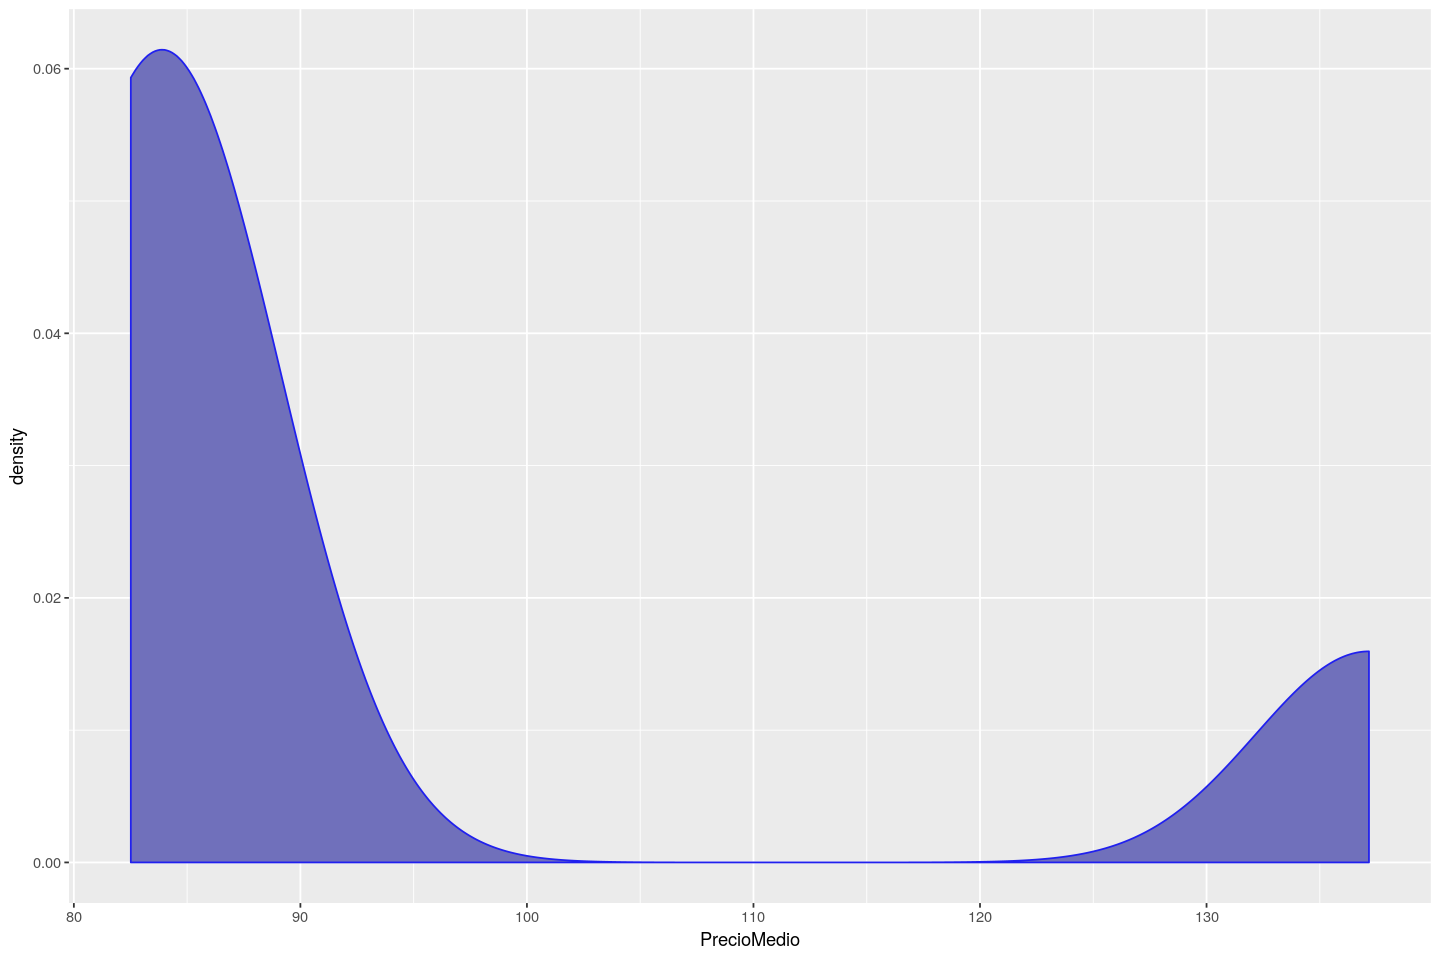

In [25]:
ggplot(data=df_barrio_cien,aes(x=PrecioMedio))+geom_density(fill='#7070BB',color="#2020EE",bw=5)

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [26]:
df_barrio_metros<-data.frame(aggregate(MetrosCuadrados~Barrio,airbnb,mean,na.rm=TRUE))
names(df_barrio_metros)<-c('Barrio','MediaMetros')
df_freq_metros<-data.frame(head((merge (df_barrio_cien,df_barrio_metros, by = "Barrio", sort=F))[order(-df_barrio_cien$Precio),],5))
df_freq_metros

,Barrio,PrecioMedio,Freq,MediaMetros
,<fct>,<dbl>,<int>,<dbl>
1,Recoletos,137.16959,149,26.66333
2,Sol,85.58936,833,41.40328
3,Goya,84.93013,187,50.40800
4,Trafalgar,82.55238,279,48.51400
5,Cortes,82.51467,671,15.35200


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

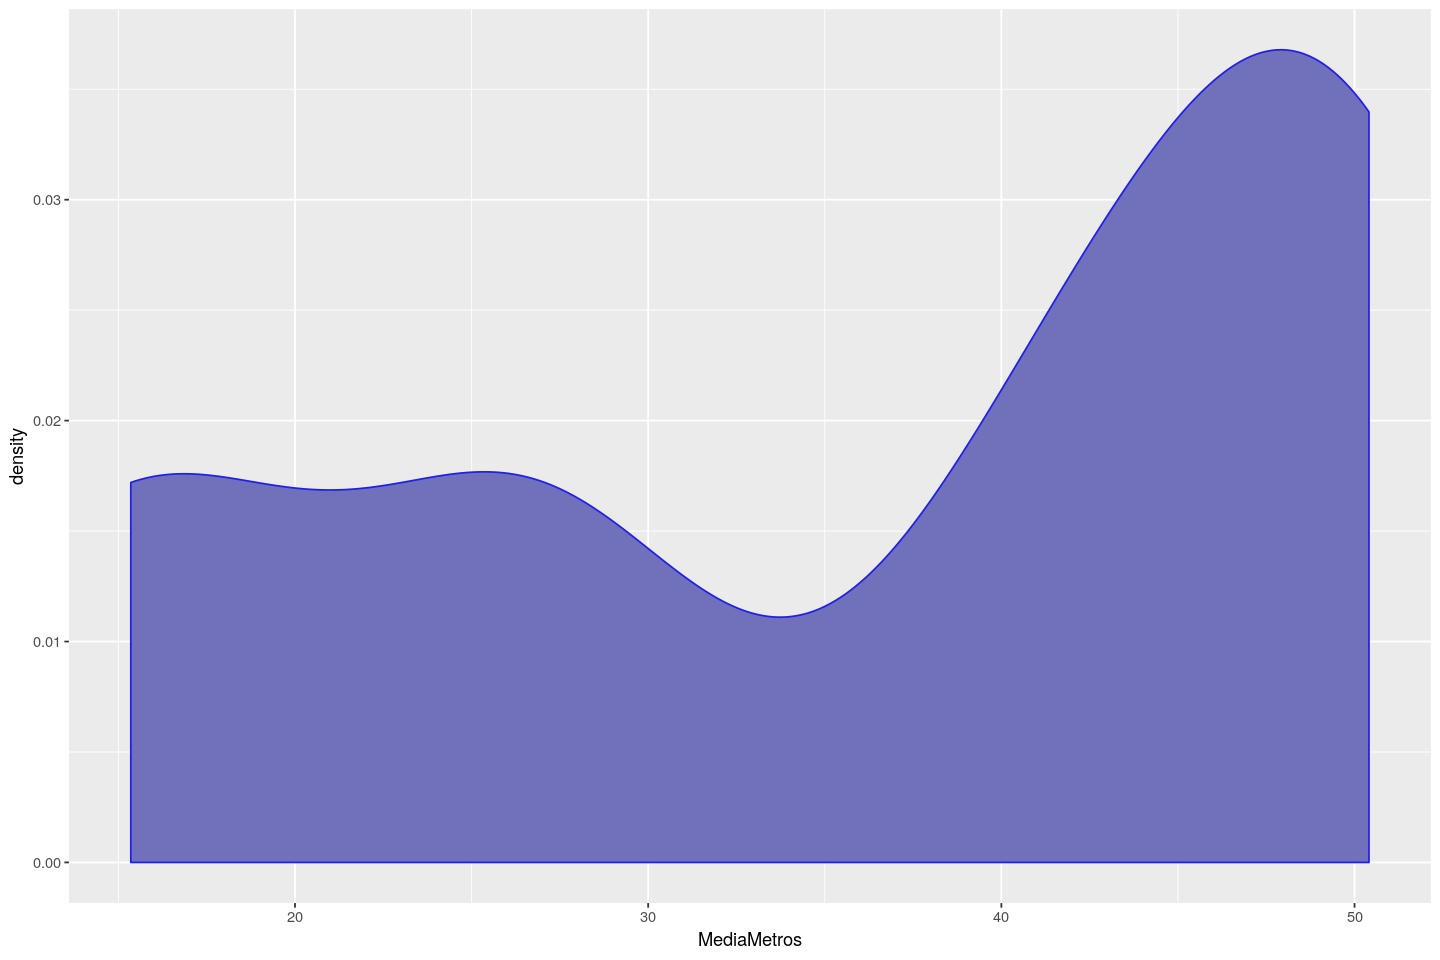

In [27]:
ggplot(data=df_freq_metros,aes(x=MediaMetros))+
geom_density(fill='#7070BB',color="#2020EE",bw=5)

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [28]:
paste('usaremos el test kruskal walls')
airbnb_medias<-airbnb[(airbnb$Barrio)=='Recoletos'|(airbnb$Barrio)=='Sol'|(airbnb$Barrio)=='Goya'|(airbnb$Barrio)=='Trafalgar'|(airbnb$Barrio)=='Cortes',]
kruskal.test(MetrosCuadrados~Barrio, data=airbnb_medias)
paste('vemos que segun el test dice que son estadisticamente significativo el unico problema que hay muchos NA y muchos apartamentos con 0 Metros')
airbnb_medias<-airbnb_medias[(airbnb_medias$MetrosCuadrados)>0,]
airbnb_medias<-airbnb_medias[!is.na(airbnb_medias$MetrosCuadrados),]
kruskal.test(MetrosCuadrados~Barrio, data=airbnb_medias)
paste('una vez limpios vemos que no son estadisticamente significativos')

[1] "usaremos el test kruskal walls"


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 9.3802, df = 4, p-value = 0.05227


[1] "vemos que segun el test dice que son estadisticamente significativo el unico problema que hay muchos NA y muchos apartamentos con 0 Metros"


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 10.999, df = 4, p-value = 0.02657


[1] "una vez limpios vemos que no son estadisticamente significativos"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [29]:
#elimino las columnas que no voy a necesitar
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
barrio_sol$CodigoPostal<-NULL
barrio_sol$	TipoPropiedad<-NULL
barrio_sol$TipoAlquiler<-NULL
barrio_sol$TipoCama<-NULL
barrio_sol$Barrio<-NULL
barrio_sol$Comodidades<-NULL
barrio_sol$PiesCuadrados<-NULL
barrio_sol$Puntuacion<-NULL
head(na.omit(barrio_sol))

,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,Precio,MetrosCuadrados
,<int>,<dbl>,<int>,<int>,<int>,<dbl>
15,4,1,1,1,75,60.02
25,4,1,1,1,100,69.96
46,2,1,1,1,65,24.99
47,3,1,0,2,41,0.00
570,5,2,2,4,90,0.00
574,8,2,4,5,250,200.02


In [30]:
combina<-lm(barrio_sol$NumBanyos~barrio_sol$MaxOcupantes)
summary(combina)



Call:
lm(formula = barrio_sol$NumBanyos ~ barrio_sol$MaxOcupantes)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2423 -0.1611 -0.1611  0.1857  2.7577 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.467425   0.038130   12.26   <2e-16 ***
barrio_sol$MaxOcupantes 0.173428   0.007511   23.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4088 on 699 degrees of freedom
Multiple R-squared:  0.4327,	Adjusted R-squared:  0.4319 
F-statistic: 533.2 on 1 and 699 DF,  p-value: < 2.2e-16


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [31]:
cor(na.omit(barrio_sol))

,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,Precio,MetrosCuadrados
MaxOcupantes,1.0000000,0.7017290,0.7853809,0.9314625,0.5269961,0.4286106
NumBanyos,0.7017290,1.0000000,0.6873719,0.6096792,0.5975571,0.4820403
NumDormitorios,0.7853809,0.6873719,1.0000000,0.7606126,0.7160551,0.5684425
NumCamas,0.9314625,0.6096792,0.7606126,1.0000000,0.4475698,0.3514033
Precio,0.5269961,0.5975571,0.7160551,0.4475698,1.0000000,0.6381649
MetrosCuadrados,0.4286106,0.4820403,0.5684425,0.3514033,0.6381649,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


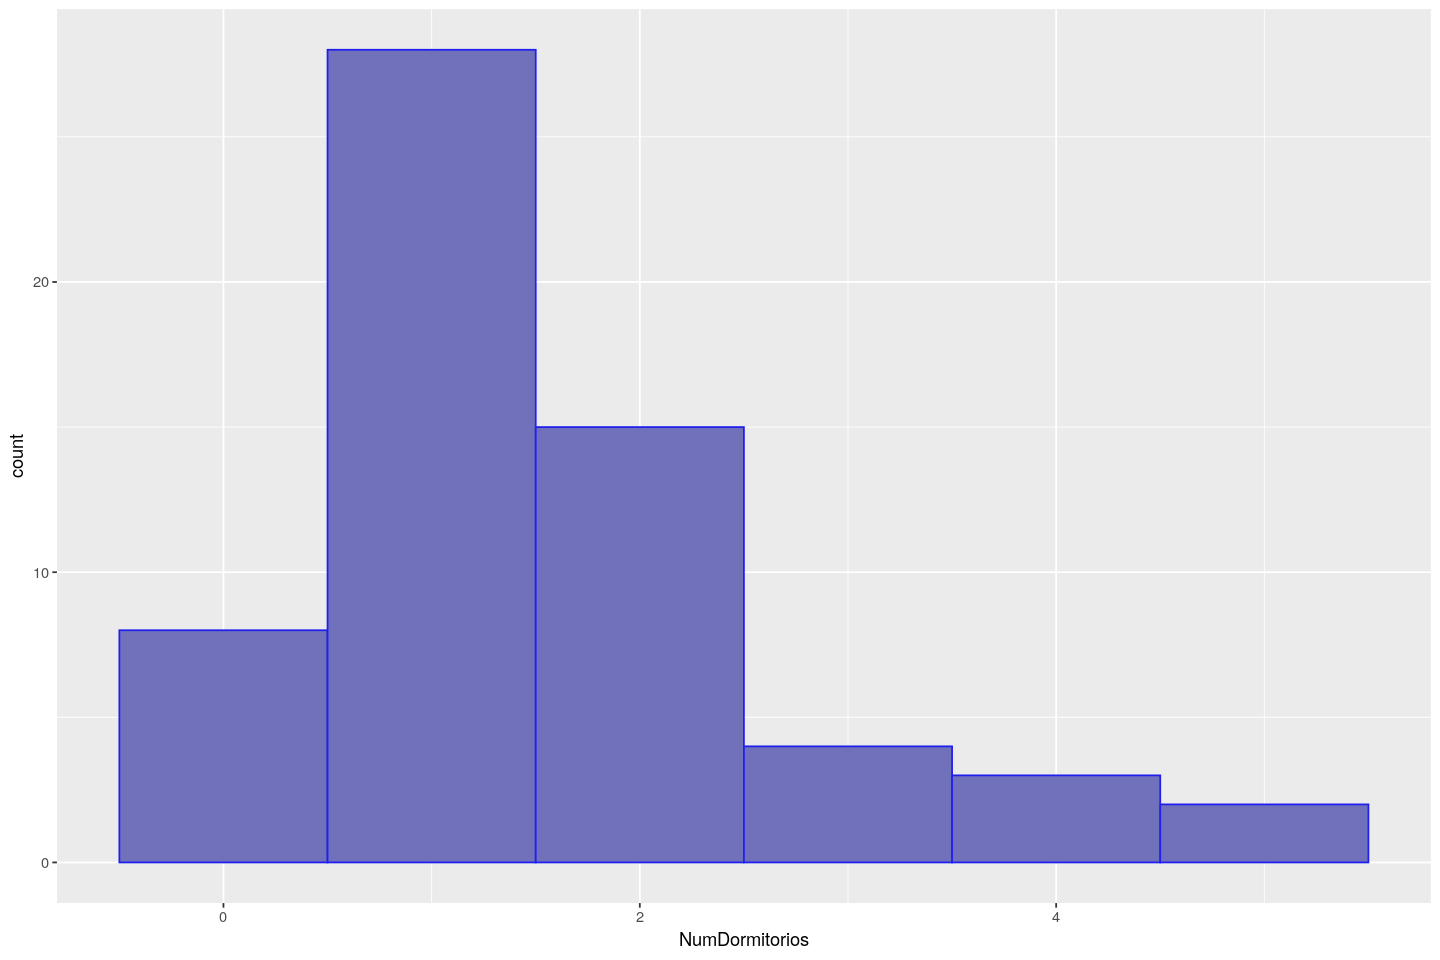

In [32]:
ggplot(data=na.omit(barrio_sol),aes(x=NumDormitorios))+
geom_histogram(bins=6,fill='#7070BB',color="#2020EE")

[1] "Observamos que hay muchos airbnb con menos de 1 metros cuadrados que debemos limpiar"

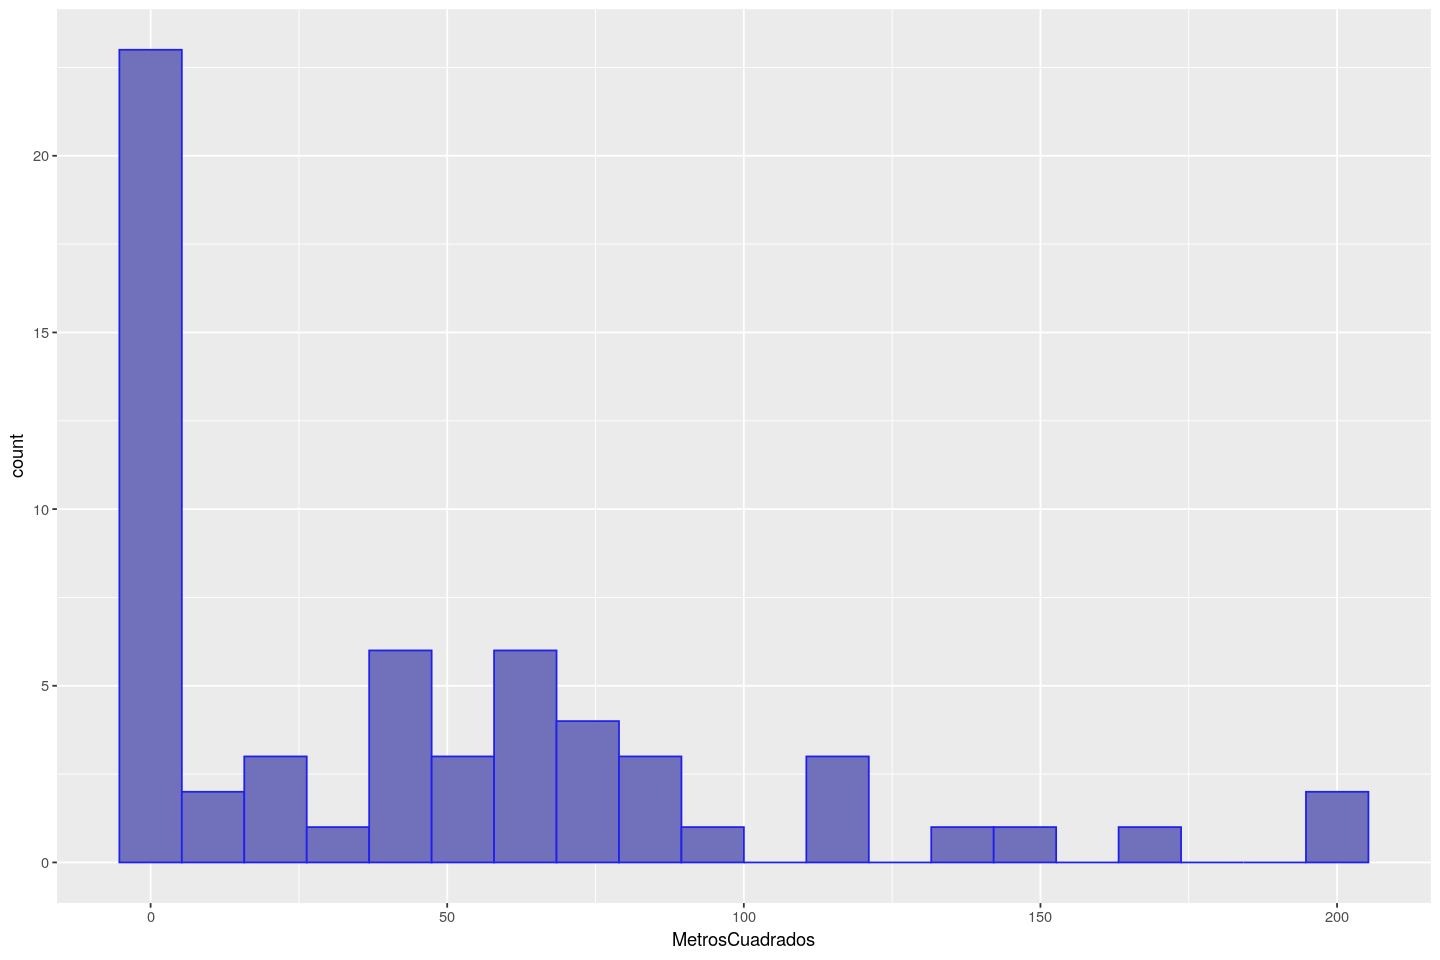

In [33]:
ggplot(data=na.omit(barrio_sol),aes(x=MetrosCuadrados))+
geom_histogram(bins=20,fill='#7070BB',color="#2020EE")
paste('Observamos que hay muchos airbnb con menos de 1 metros cuadrados que debemos limpiar')


In [34]:
paste('limpiamos los apartamentos con menos de 1 metro cuadrado')
barrio_sol$MetrosCuadrados[barrio_sol$MetrosCuadrados<1]<-NA
cor(na.omit(barrio_sol))


[1] "limpiamos los apartamentos con menos de 1 metro cuadrado"

,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,Precio,MetrosCuadrados
MaxOcupantes,1.0000000,0.8528252,0.7841590,0.9124683,0.7291838,0.7108110
NumBanyos,0.8528252,1.0000000,0.7356920,0.7686382,0.6620249,0.5711959
NumDormitorios,0.7841590,0.7356920,1.0000000,0.8130327,0.8590378,0.7717363
NumCamas,0.9124683,0.7686382,0.8130327,1.0000000,0.7086276,0.7084541
Precio,0.7291838,0.6620249,0.8590378,0.7086276,1.0000000,0.7401898
MetrosCuadrados,0.7108110,0.5711959,0.7717363,0.7084541,0.7401898,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [35]:
combina<-lm(barrio_sol$Precio~barrio_sol$MaxOcupantes+barrio_sol$NumBanyos+barrio_sol$NumDormitorios+barrio_sol$NumCamas+barrio_sol$MetrosCuadrados)
summary(combina)


Call:
lm(formula = barrio_sol$Precio ~ barrio_sol$MaxOcupantes + barrio_sol$NumBanyos + 
    barrio_sol$NumDormitorios + barrio_sol$NumCamas + barrio_sol$MetrosCuadrados)

Residuals:
    Min      1Q  Median      3Q     Max 
-72.984 -13.182  -5.206  15.198  69.502 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 28.7229    11.5099   2.495 0.017594 *  
barrio_sol$MaxOcupantes      5.5077     5.4473   1.011 0.319110    
barrio_sol$NumBanyos        -1.0764    13.6094  -0.079 0.937422    
barrio_sol$NumDormitorios   32.5073     7.9043   4.113 0.000234 ***
barrio_sol$NumCamas         -5.2141     5.4034  -0.965 0.341376    
barrio_sol$MetrosCuadrados   0.1868     0.1579   1.183 0.245068    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.51 on 34 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7627,	Adjusted R-squared:  0.7278 
F-statistic: 

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [36]:
combina_dos<-lm(barrio_sol$Precio~barrio_sol$NumDormitorios+barrio_sol$MetrosCuadrados)
summary(combina_dos)
paste('vemos que el numero de dormitorios es mas fiable')


Call:
lm(formula = barrio_sol$Precio ~ barrio_sol$NumDormitorios + 
    barrio_sol$MetrosCuadrados)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.136 -16.183  -0.823  15.801  68.084 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 36.8283     7.9806   4.615 4.61e-05 ***
barrio_sol$NumDormitorios   32.5587     5.8816   5.536 2.67e-06 ***
barrio_sol$MetrosCuadrados   0.2152     0.1449   1.486    0.146    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.88 on 37 degrees of freedom
  (661 observations deleted due to missingness)
Multiple R-squared:  0.7527,	Adjusted R-squared:  0.7393 
F-statistic: 56.31 on 2 and 37 DF,  p-value: 5.953e-12


[1] "vemos que el numero de dormitorios es mas fiable"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [37]:
precio_metro <- lm(data=barrio_sol, formula= Precio ~ MetrosCuadrados)
margen_uno<-confint(precio_metro)
margen_uno

paste('el incremento por cada metro cuadrado con un margen del 95% es: ',margen_uno[2],'   ',margen_uno[4])



,2.5 %,97.5 %
(Intercept),25.5462285,67.595136
MetrosCuadrados,0.5853199,1.083026


[1] "el incremento por cada metro cuadrado con un margen del 95% es:  0.585319947626517     1.08302568886585"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [38]:
precio_habitacion <- lm(data=barrio_sol, formula= Precio ~ NumDormitorios)
margen_dos<-confint(precio_habitacion)
margen_dos

paste('el incremento por cada habitación con un margen del 95% es: ',margen_dos[2],'   ',margen_dos[4])


,2.5 %,97.5 %
(Intercept),47.54299,57.62561
NumDormitorios,30.50004,36.22803


[1] "el incremento por cada habitación con un margen del 95% es:  30.5000398658093     36.2280331958965"

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [39]:
# metemos en una tabla la columna del numero de dormitorios
tb_dormitorios<-table(barrio_sol$NumDormitorios)
#sumamos todos los apartamentos
n<-sum(as.numeric(tb_dormitorios))
#buscamos los apartamentos que tienen 3 dormitorios
ns<-as.numeric(tb_dormitorios[('3')])
binom.test(ns,n)
paste('nuestro dataset tiene ',n,' entradas y de ellas ',ns,' con 3 dormitorios')
paste('la probabilidad de encontrar un apartamento con 3 dormitorios en el barrio de sol es: ',round((ns/n)*100,2),'%')
paste('el margen del 0.5% - 95% de intervalo de confianza es: 0.0596506   0.1009033')


	Exact binomial test

data:  ns and n
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 


[1] "nuestro dataset tiene  701  entradas y de ellas  55  con 3 dormitorios"

[1] "la probabilidad de encontrar un apartamento con 3 dormitorios en el barrio de sol es:  7.85 %"

[1] "el margen del 0.5% - 95% de intervalo de confianza es: 0.0596506   0.1009033"